# EXPLORATORY DATA ANALYSIS OF BROOKLYIN PROPERTIES BETWEEN FROM 2003 TO 2017.

# The importance of this exploratory analysis for this dataset is to uncover some insights which include:

To uncover pricey and cheap Neighborhoods to buy family homes and commercial properties in brooklyn.
To identify both expensive and cheap geographical region of brooklyn to buy properties.
To visualize seasonality in the properties purchase in brooklyn between 2003 and 2017.

Importing the require libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
full_sale = pd.read_csv("full_sale.csv")

In [3]:
full_sale.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month,month_number,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,October,Northwestern Brooklyn,7


In [4]:
# renaming 2 columns from the dataframe
full_sale = full_sale.rename(columns=({"month":"month_number", "month_number":"month"}))

In [5]:
full_sale.shape

(390876, 16)

In [6]:
full_sale.isnull().sum()

Unnamed: 0                  0
neighborhood                0
building_class_category     0
tax_class_at_sale           0
building_class_at_sale      0
address                     0
sale_price                  0
sale_date                   0
year_of_sale                0
land_sqft                   0
gross_sqft                  0
OwnerName                   0
month_number                0
month                       0
geographical_region         0
mins_to_manhattan_bridge    0
dtype: int64

# 1. LANDING PROPERTIES ANALYSIS

The approach is to extract the landing properties in the dataset so we can highlight the neigborhood with expensive landing properties, which will give us an insight regarding where to get cheap lands that fit into our budget.

First we need to set a price baseline of 50,000 USD of lands purchased from 2003 to 2017 due to some low sale_price which we consider to be unclear, then group by brooklyn distinct geographical region in the dataframe and map each geographical region to it's average sale price of the lands.

In [7]:
vacant_land = full_sale.loc[(full_sale["building_class_at_sale"] == "V0") & (full_sale["sale_price"] >= 50000)]

In [8]:
vacant_land.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month_number,month,geographical_region,mins_to_manhattan_bridge
63,63,WILLIAMSBURG,05 TAX CLASS 1 VACANT LAND,1,V0,KENT AVENUE,65600000.0,2012-08-30,2012,75707.0,522607.0,"NORTH 4TH PLACE, LLC",8,August,Northern Brooklyn,10
70,70,GREENPOINT,05 TAX CLASS 1 VACANT LAND,1,V0,COMMERCIAL STREET,59757356.0,2015-10-19,2015,5293.0,0.0,BOP GREENPOINT F LLC,10,October,Northern Brooklyn,12
111,111,GREENPOINT,05 TAX CLASS 1 VACANT LAND,1,V0,COMMERCIAL STREET,46485643.0,2015-10-19,2015,14284.0,0.0,BOP GREENPOINT G LLC,10,October,Northern Brooklyn,12
130,130,WILLIAMSBURG,05 TAX CLASS 1 VACANT LAND,1,V0,44 SOUTH 8TH STREET,42565000.0,2007-12-11,2007,95275.0,43370.0,Anonymous,12,December,Northern Brooklyn,10
167,167,SPRING CREEK,05 TAX CLASS 1 VACANT LAND,1,V0,VANDALIA AVENUE,35000000.0,2013-02-13,2013,2574982.0,0.0,NYC PARKS,2,February,Eastern Brooklyn,35


In [9]:
land_avg_price = vacant_land.groupby("geographical_region")["sale_price"].median().reset_index().sort_values("sale_price",ascending = False).rename(columns=({"sale_price":
                                                                                                                         "median_sale_price"}))

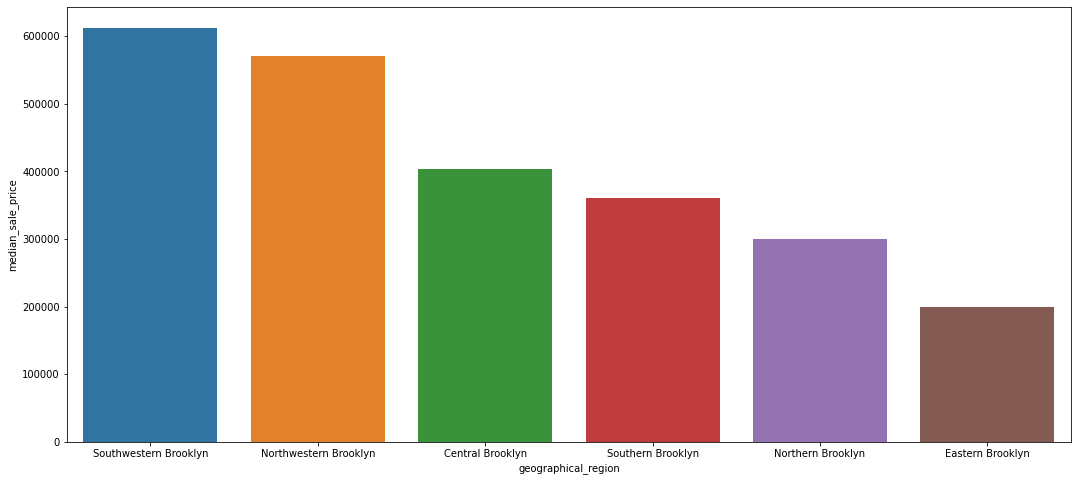

In [10]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(land_avg_price["geographical_region"], land_avg_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")
plt.show()

Looking at the plot of the 6 geographical locations in brooklyn above, it's evident that landing property sale price in southwestern and northwestern part of brooklyn are the most expensive , contrary to eastern and northern part being the least expensive in the borough.

In [12]:
land_avg_price = vacant_land.groupby("neighborhood")["sale_price"].median().reset_index().sort_values("sale_price", 
                                                                                                      ascending =False).rename(columns=({"sale_price":
                                                                                                                                         "median_sale_price"})).head(3)

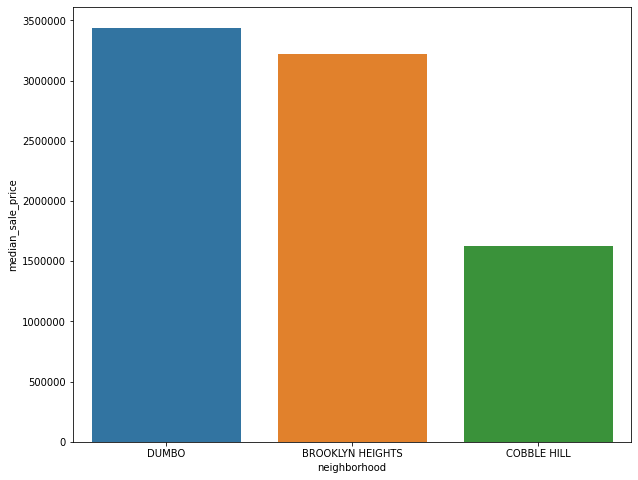

In [14]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(land_avg_price["neighborhood"], land_avg_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")
plt.show()

The bar plot above shows the median sale price of lands in different neighborhood in brooklyn. The 3 most expensive neighborhood in terms of landing property are Cobble hill with over 4,000,000 USD while Dumbo and Brookln heights with 3,400,000 USD and 3,200,000 USD respectively.

In [18]:
land_avg_price = vacant_land.groupby("neighborhood")["sale_price"].median().reset_index().sort_values("sale_price", 
                                                                                                      ascending =False).rename(columns=({"sale_price":
                                                                                                                                         "median_sale_price"})).head(3)

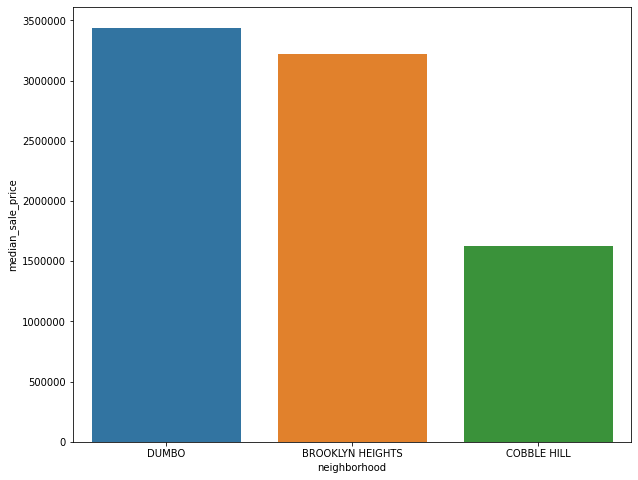

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(land_avg_price["neighborhood"], land_avg_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")
plt.show()

# SETTING 100K+ THRESHOLD FOR SALE_PRICE

Lots of property sales are below one thousand dollars and many low sale prices, which does not reflect the actual price of this big properties, based on this unclarity of the price,we decided to set a price baseline to get properties above 100000 USD.

In [21]:
properties_over_100k = full_sale.loc[full_sale["sale_price"] > 100000]

In [22]:
properties_over_100k.head()

,Unnamed: 0,neighborhood,building_class_category,tax_class_at_sale,building_class_at_sale,address,sale_price,sale_date,year_of_sale,land_sqft,gross_sqft,OwnerName,month_number,month,geographical_region,mins_to_manhattan_bridge
0,0,DOWNTOWN-METROTECH,28 COMMERCIAL CONDOS,4,R5,330 JAY STREET,499401179.0,2008-04-23,2008,0.0,0.0,Anonymous,4,April,Northwestern Brooklyn,3
1,1,DUMBO,29 COMMERCIAL GARAGES,4,G7,85 JAY STREET,345000000.0,2016-12-20,2016,134988.0,0.0,85 JAY STREET BROOKLY,12,December,Northwestern Brooklyn,4
2,2,BROOKLYN HEIGHTS,21 OFFICE BUILDINGS,4,O6,29 COLUMBIA HEIGHTS,340000000.0,2016-08-03,2016,32000.0,304650.0,25-30 COLUMBIA HEIGHT,8,August,Northwestern Brooklyn,7
3,3,MILL BASIN,22 STORE BUILDINGS,4,K6,5120 AVENUE U,276947000.0,2012-11-28,2012,905000.0,2548000.0,BROOKLYN KINGS PLAZA,11,November,Southern Brooklyn,33
4,4,BROOKLYN HEIGHTS,26 OTHER HOTELS,4,H8,21 CLARK STREET,202500000.0,2017-10-31,2017,20267.0,356000.0,WATCHTOWER C/O REAL P,10,October,Northwestern Brooklyn,7


Exporting properties that are above 100k dataset to Tableau.

In [23]:
properties_over_100k.to_csv("tableau_data.csv")

In [24]:
region_average_price = properties_over_100k.groupby("geographical_region")["sale_price"].median().reset_index().sort_values("sale_price", 
                                                                                                                            ascending=False).rename(columns=({"sale_price":"median_sale_price"}))

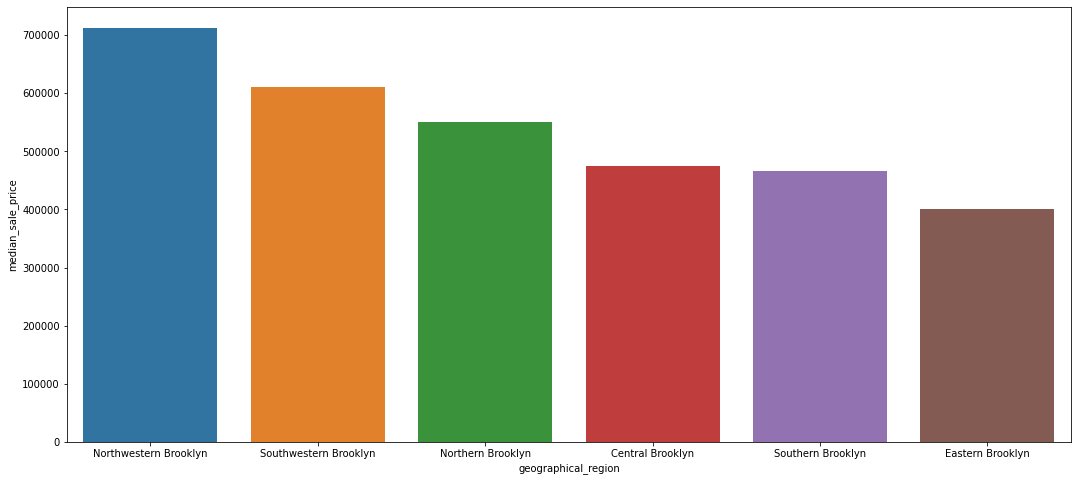

In [25]:
fig, ax = plt.subplots(figsize=(18, 8))
sns.barplot(region_average_price["geographical_region"], region_average_price["median_sale_price"])
plt.ticklabel_format(axis="y", style="plain")
plt.show()

The above barplot shows again that properties(land inclusive) in the Northwestern and southwestern of Brooklyn are expensive.

# FAMILY HOME PROPERTIES ANALYSIS

Family homes are constantly in high demand all over the world, places like Brooklyn,NY it's no exception and its certain the volume of the demand will be huge, However, knowing the median prices of some regions and neighborhoods in the borough of Brooklyn can be impactful in the property hunt which is why we are going to extract all family homes which all lies in the tax class 1.